In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
# from IPython.display import display

# %matplotlib notebook

Text(0, 0.5, 'Feature 2')

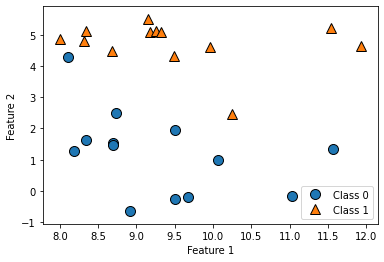

In [5]:
# discrete data

X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(
    ['Class 0', 'Class 1'],
    loc=4,
)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Text(0, 0.5, 'Target')

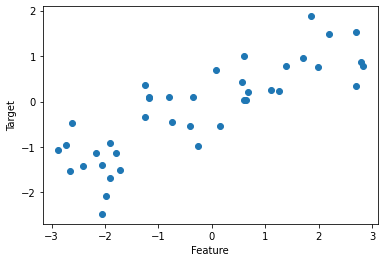

In [7]:
# continuous data

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.xlabel('Feature')
plt.ylabel('Target')

In [9]:

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [11]:
for n, v in zip(cancer.target_names, np.bincount(cancer.target)):
    print(n, v)

malignant 212
benign 357


In [13]:
from sklearn.datasets import load_boston

boston = load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
X, y = mglearn.datasets.load_extended_boston()

X.shape

(506, 104)

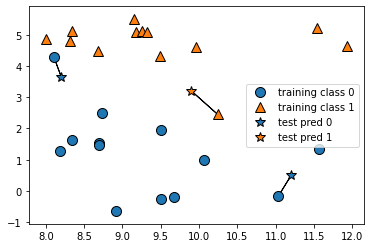

In [17]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

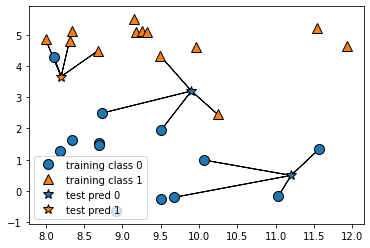

In [19]:
mglearn.plots.plot_knn_classification(n_neighbors=4)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
# initiate and define model
knn = KNeighborsClassifier(n_neighbors=3)

# train (store) model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
# predict
knn.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [27]:
# score model
knn.score(X_test, y_test)

0.8571428571428571

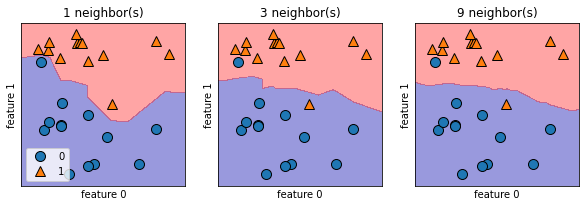

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n, ax in zip([1, 3, 9], axes):
    knn = KNeighborsClassifier(n_neighbors=n).fit(X, y)
    mglearn.plots.plot_2d_separator(knn, X, ax=ax, fill=True, alpha=0.4, eps=0.5)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

axes[0].legend(loc=3)

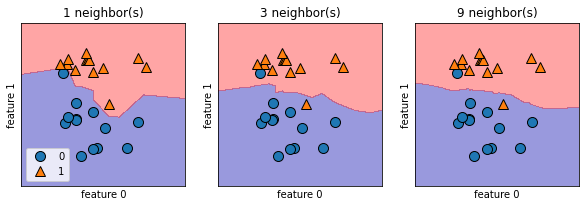

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n, ax in zip([1, 3, 9], axes):
    knn = KNeighborsClassifier(n_neighbors=n).fit(X, y)
    mglearn.plots.plot_2d_separator(knn, X, ax=ax, fill=True, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

axes[0].legend(loc=3)

In [33]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state=66,
)

training_accuracy = []
test_accuracy = []
n_neighbors = range(1, 11)

for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)

    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))



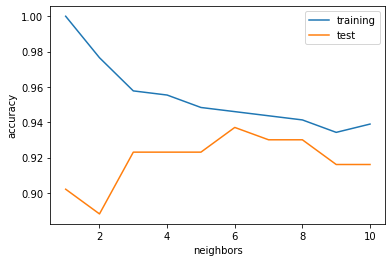

In [37]:
plt.plot(n_neighbors, training_accuracy, label='training')
plt.plot(n_neighbors, test_accuracy, label='test')
plt.xlabel('neighbors')
plt.ylabel('accuracy')
plt.legend()

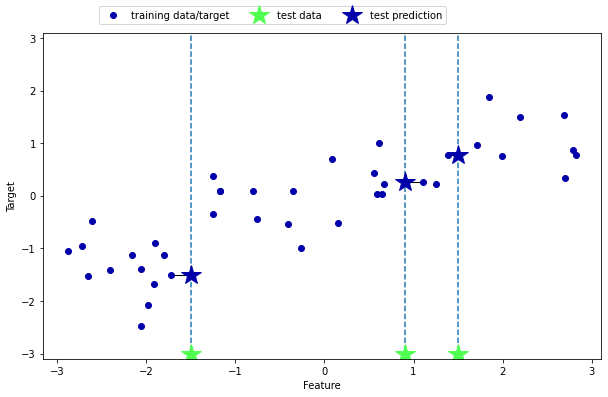

In [39]:
mglearn.plots.plot_knn_regression(n_neighbors=1)


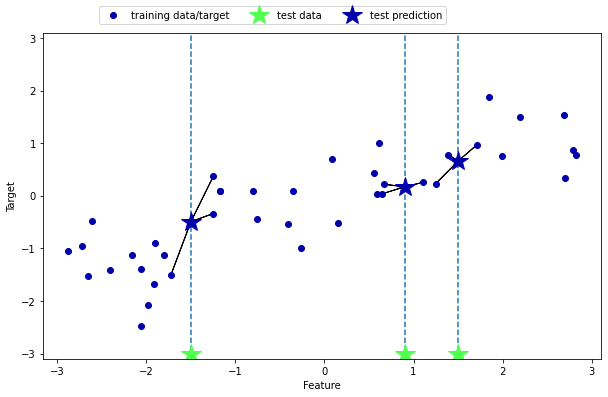

In [47]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [60]:
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

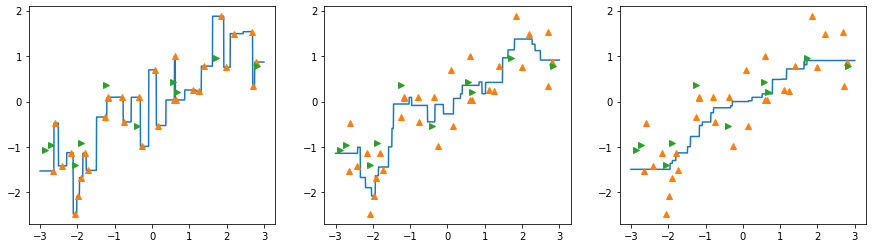

In [65]:
from sklearn.neighbors import KNeighborsRegressor

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n, ax in zip([1, 3, 9], axes):

    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)

    knn.predict(line)
    ax.plot(line, knn.predict(line))
    ax.plot(X_train, y_train, '^')
    ax.plot(X_test, y_test, '>')